### Программа профессиональной переподготовки
## **"Аналитик данных: с нуля до разработки прикладных решений для бизнеса"**
## *Итоговый проект по курсу.*
### **Вариант №1: Анализ маркетинговой компании банка.**

> Выполнила Гаврилова Ольга Михайловна

> Группа ДА - 806

> 2023 г





**Аналитическая задача** -- по признаковому описанию построить портрет клиента, склонного к положительному отклику на рекламное предложение.

Предполагается, что получив такую оценку для некоторого множества клиентов, компания будет обращаться только к тем из них, которые склонны к отклику.

**Описание полей**

|Признак|Расшифровка|
|--:|:--|
| AGREEMENT_RK | уникальный идентификатор объекта в выборке |
| TARGET | целевая переменная:отклик на маркетинговую кампанию (1 - отклик был зарегистрирован, 0 - отклика не было) |
| AGE |	возраст клиента |
| SOCSTATUS_WORK_FL | социальный статус клиента относительно работы (1 - работает, 0 - не работает)|
| SOCSTATUS_PENS_FL | социальный статус клиента относительно пенсии (1 - пенсионер, 0 - не пенсионер)|
| GENDER | пол клиента |
| CHILD_TOTAL | количество детей клиента |
| DEPENDANTS | количество иждивенцев клиента
| EDUCATION | образование |
| MARITAL_STATUS | семейное положение |
| GEN_INDUSTRY | отрасль работы клиента |
| GEN_TITLE |	должность |
| ORG_TP_STATE |	форма собственности компании|
| ORG_TP_FCAPITAL |	отношение к иностранному капиталу|
| JOB_DIR |	направление деятельности внутри компании|
| FAMILY_INCOME |	семейный доход (несколько категорий)|
| PERSONAL_INCOME |	личный доход клиента (в рублях)|
| REG_ADDRESS_PROVINCE | область регистрации клиента|
| FACT_ADDRESS_PROVINCE | область фактического пребывания клиента |
| POSTAL_ADDRESS_PROVINCE |	почтовый адрес область|
| TP_PROVINCE |	область торговой точки, где клиент брал последний кредит|
| REGION_NM	| регион РФ |
| FL_PRESENCE_FL | наличие в собственности квартиры (1 - есть, 0 - нет)|
| OWN_AUTO | кол-во автомобилей в собственности|
| AUTO_RUS_FL | наличие в собственности автомобиля российского производства ( 1 - есть, 0 - нет)|
| HS_PRESENCE_FL |	наличие в собственности загородного дома (1 - есть, 0 - нет)|
| COT_PRESENCE_FL |	наличие в собственности котеджа (1 - есть, 0 - нет) |
| GAR_PRESENCE_FL |	наличие в собственности гаража (1 - есть, 0 - нет)|
| LAND_PRESENCE_FL | наличие в собственности земельного участка (1 - есть, 0 - нет)|
| FACT_LIVING_TERM | количество месяцев проживания по месту фактического пребывания |
| WORK_TIME | время работы на текущем месте (в месяцах) |
| CREDIT | сумма последнего кредита клиента (в рублях) |
| TERM | срок кредита, мес.|
| LOAN_NUM_PAYM | количество платежей, которые сделал клиент |
| LOAN_DLQ_NUM | количество просрочек, допущенных клиентом |
| LOAN_MAX_DLQ_AMT | максимальная сумма просрочки (в рублях) |
| DATE_CREDIT | дата взятия кредита |

**Примерный план по выполнению проекта**

Шаг 1. Загрузка данных;

Шаг 2. Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения.

Шаг 3. Добавьте в таблицу следующие признаки:
- день недели, месяц и год взятия кредита;
- адрес регистрации и адрес фактического пребывания клиента совпадают (1 -- совпадает, 0 -- не совпадает);
- адрес фактического пребывания клиента и его почтовый адрес совпадают(1 -- совпадает, 0 -- не совпадает);
- адрес регистрации клиента и его почтовый адрес совпадают(1 -- совпадает, 0 -- не совпадает);
- почтовый, фактический и адрес регистрации совпадают (1 -- совпадают, 0 -- не совпадают);
- область регистрации, фактического пребывания, почтового адреса и область расположения торговой точки, где клиент брал кредит совпадают (1 -- совпадают, 0 -- не совпадают);

Шаг 4. Провести исследовательский анализ данных:
- исследовать динамику количества кредитов по годам, месяцам;
- исследовать числовые и категориальные признаки в разрезе целевого признака;
- сделать выводы о влиянии признаков на целевой признак.

# **Шаг 1.** Подготовка к работе. Загрузка данных. Подключение библиотек.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from ydata_profiling import ProfileReport

# Подключение методов для проверки гипотез о виде закона распределения
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import ks_2samp

# Тесты для проверки гипотезы о равенстве параметров распределений
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('dataset_target_company.csv')

# Установка этой опции позволяет выводить на экран все столбцы DataFrame, что упрощает анализ данных.
pd.set_option('display.max_columns', None)

***Получение сведений о датафреме.***

In [3]:
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGREEMENT_RK             15223 non-null  int64  
 1   TARGET                   15223 non-null  int64  
 2   AGE                      15223 non-null  int64  
 3   SOCSTATUS_WORK_FL        15223 non-null  int64  
 4   SOCSTATUS_PENS_FL        15223 non-null  int64  
 5   GENDER                   15223 non-null  int64  
 6   CHILD_TOTAL              15223 non-null  int64  
 7   DEPENDANTS               15223 non-null  int64  
 8   EDUCATION                15223 non-null  object 
 9   MARITAL_STATUS           15223 non-null  object 
 10  GEN_INDUSTRY             13856 non-null  object 
 11  GEN_TITLE                13856 non-null  object 
 12  ORG_TP_STATE             13856 non-null  object 
 13  ORG_TP_FCAPITAL          13858 non-null  object 
 14  JOB_DIR               

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ_AMT,DATE_CREDIT
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000.0,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,0,0,0,0,0,0,0,8000.0,6,220,18.0,6,2,1580.0,2017-10-01 15:09:09
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000.0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,0,0,0,0,0,0,0,21650.0,6,137,97.0,6,1,4020.0,2020-10-09 18:58:35


# **Шаг 2.** Первичная обработка данных. Работа с заголовками. Приведение типов. Обработка пропусков и аномалий. Удаление дубликатов.

Приведем заголовки к нижнему регистру.

In [4]:
df.columns = df.columns.str.lower()

  Приведем признак `date_credit`(дата взятия кредита) к типу данных datatime64.

In [5]:
df = df.astype({'date_credit': 'datetime64[ns]'})

Дублирующихся записей в датасете нет.

In [6]:
df.duplicated().sum()

0

***Поиск пропущенных значений.***



In [7]:
# Оценим процент пропусков
for col in df.columns:
    missing_values = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_values*100, 2)))

agreement_rk - 0.0%
target - 0.0%
age - 0.0%
socstatus_work_fl - 0.0%
socstatus_pens_fl - 0.0%
gender - 0.0%
child_total - 0.0%
dependants - 0.0%
education - 0.0%
marital_status - 0.0%
gen_industry - 8.98%
gen_title - 8.98%
org_tp_state - 8.98%
org_tp_fcapital - 8.97%
job_dir - 8.98%
family_income - 0.0%
personal_income - 0.0%
reg_address_province - 0.0%
fact_address_province - 0.0%
postal_address_province - 0.0%
tp_province - 1.94%
region_nm - 0.01%
fl_presence_fl - 0.0%
own_auto - 0.0%
auto_rus_fl - 0.0%
hs_presence_fl - 0.0%
cot_presence_fl - 0.0%
gar_presence_fl - 0.0%
land_presence_fl - 0.0%
credit - 0.0%
term - 0.0%
fact_living_term - 0.0%
work_time - 8.99%
loan_num_paym - 0.0%
loan_dlq_num - 0.0%
loan_max_dlq_amt - 0.0%
date_credit - 0.0%


Пропуски наблюдаются в категориальных признаках, таких как: отрасль работы клиента, должность, форма собственности компании, отношение к иностранному капиталу, направление деятельности внутри компании, область торговой точки, где клиент брал последний кредит. Можно использовать некоторый дефолтный параметр для пропусков, например, новую категорию _Неизвестно_.

In [8]:
missing_values_col = df[['gen_title', 'gen_industry',
                        'org_tp_state', 'org_tp_fcapital',
                        'job_dir']]

for col in missing_values_col:
   df[col] = df[col].fillna('_Неизвестно_')

Для заполнения пропусков в признаке `tp_province` воспользуемся соответствующими данными из столбца `fact_address_province`.

In [9]:
df['tp_province'] = df['tp_province'].fillna(df['fact_address_province'])

В непрерывном признаке `work_time`(время работы) заменим пропуски медианой.

In [10]:
df['work_time'].fillna(df['work_time'].median(), inplace= True)

 Пропуск в признаке `region_nm` всего 1, удалим его из датасета.

In [11]:
df['region_nm'].isnull().sum()
df.dropna(subset=['region_nm'], inplace = True)

# ***Обработка аномалий.***

## Описательные статистики для числовых признаков.

Для удобства разделим все признаки на категориальные и числовые и сохраним их в отдельные датафреймы.

In [12]:
# Отбор числовых признаков

numeric = ['age', 'child_total', 'dependants']

numeric_1 = ['personal_income',
           'credit', 'term', 'loan_num_paym',
           'loan_dlq_num', 'loan_max_dlq_amt',
           'fact_living_term', 'work_time']

# разделим для построения графиков (countplot, histplot подойдет не для всех признаков)

numeric_2 = ['personal_income',
           'credit', 'term', 'loan_num_paym',
           'loan_dlq_num', 'loan_max_dlq_amt']

numeric_3 = ['fact_living_term', 'work_time']

df_numeric = df[numeric].join(df[numeric_1])

# Отбор категориальных признаков

categorical = ['education', 'marital_status', 'gen_industry', 'gen_title',
              'org_tp_state', 'job_dir', 'family_income',
              'tp_province', 'region_nm']

# Бинарные признаки поместим в отдельный список

categorical_bin = ['socstatus_work_fl', 'socstatus_pens_fl', 'gender',
                'fl_presence_fl', 'auto_rus_fl', 'hs_presence_fl',
                'cot_presence_fl', 'gar_presence_fl',
                'land_presence_fl', 'own_auto']

In [13]:
per = [0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99]
round(df_numeric.describe(percentiles=per), 1).T

,count,mean,std,min,25%,50%,75%,85%,90%,95%,99%,max
age,15222.0,40.4,11.6,21.0,30.0,39.0,50.0,55.0,57.0,60.0,64.0,67.0
child_total,15222.0,1.1,1.0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,4.0,10.0
dependants,15222.0,0.6,0.8,0.0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,7.0
personal_income,15222.0,13853.9,9015.8,24.0,8000.0,12000.0,17000.0,20000.0,25000.0,30000.0,45000.0,250000.0
credit,15222.0,14668.4,12148.2,2000.0,6500.0,11550.5,19170.0,23712.7,27448.9,33800.0,70037.1,119700.0
term,15222.0,8.1,4.1,3.0,6.0,6.0,10.0,12.0,12.0,12.0,24.0,36.0
loan_num_paym,15222.0,7.9,8.0,1.0,4.0,5.0,8.0,14.0,17.0,24.0,41.0,114.0
loan_dlq_num,15222.0,0.2,0.7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,13.0
loan_max_dlq_amt,15222.0,243.0,836.1,0.0,0.0,0.0,0.0,0.0,910.0,1900.0,3780.0,28012.2
fact_living_term,15222.0,3039.5,262464.1,-26.0,41.0,108.0,204.0,252.0,288.0,341.0,444.0,28101997.0


*Предварительные выводы:*
1. возраст клиентов колеблется от 21 до 67 лет;
2. клиенты либо не имеют детей либо имеют 1,2 и более;
3. у всех клиентов имеется кредит;
4. в признаке `fact_living_term` выделяется отрицательное значение -26(нужно исправить);
5. 85% клиентов не имеют просрочки по кредиту;
6. 95% клиентов с доходом ниже 30000;
7. срок кредитования от 3 месяцев до 3 лет;
8. выделяется аномально большой доход  - 250000 руб(требует проверки)

Только 8 клиентов банка имеют доход выше 100000. В сравнении с признаком `family_income` - семейный доход,  можно сделать вывод , что в записи данных значений допущена ошибка (лишний 0). Исправим это.

In [14]:
df.loc[((df['personal_income']>100000)
        & ((df['family_income'] == 'от 20000 до 50000 руб.')
        | (df['family_income'] == 'от 10000 до 20000 руб.')))]

,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,education,marital_status,gen_industry,gen_title,org_tp_state,org_tp_fcapital,job_dir,family_income,personal_income,reg_address_province,fact_address_province,postal_address_province,tp_province,region_nm,fl_presence_fl,own_auto,auto_rus_fl,hs_presence_fl,cot_presence_fl,gar_presence_fl,land_presence_fl,credit,term,fact_living_term,work_time,loan_num_paym,loan_dlq_num,loan_max_dlq_amt,date_credit
144,59927525,0,56,1,0,1,0,0,Среднее специальное,Состою в браке,Другие сферы,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,170000.0,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,ДАЛЬНЕВОСТОЧНЫЙ,1,0,0,0,0,0,1,12500.0,4,132,120.0,4,1,3520.0,2019-03-31 11:07:10
2645,61314264,0,25,1,0,0,1,2,Высшее,Состою в браке,Здравоохранение,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,150000.0,Алтайский край,Алтайский край,Алтайский край,Алтайский край,ЗАПАДНО-СИБИРСКИЙ,0,0,0,0,0,0,0,5218.0,6,24,18.0,6,0,0.0,2015-09-16 18:09:28
2726,61358155,0,53,1,0,0,2,0,Среднее специальное,Состою в браке,Металлургия/Промышленность/Машиностроение,Специалист,Частная ком. с инос. капиталом,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,250000.0,Карелия,Карелия,Карелия,Карелия,ЦЕНТРАЛЬНЫЙ 2,0,0,0,0,0,0,0,34695.0,6,5,96.0,6,0,0.0,2021-05-20 11:12:33
6276,62994542,0,49,1,0,0,1,2,Среднее специальное,Состою в браке,Ресторанный бизнес/Общественное питание,Рабочий,Частная компания,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,220000.0,Краснодарский край,Краснодарский край,Краснодарский край,Краснодарский край,ЮЖНЫЙ,0,1,1,1,0,0,0,16392.0,5,240,204.0,4,0,0.0,2017-12-27 10:30:15
7273,63994083,0,22,1,1,0,0,0,Неоконченное высшее,Не состоял в браке,Торговля,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,250000.0,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,ДАЛЬНЕВОСТОЧНЫЙ,0,0,0,0,0,0,0,23390.0,6,93,8.0,4,0,0.0,2021-02-18 11:53:05
7494,64350436,0,31,1,0,0,1,1,Высшее,Состою в браке,Государственная служба,Высококвалифиц. специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,110000.0,Саратовская область,Саратовская область,Саратовская область,Саратовская область,ПОВОЛЖСКИЙ,0,0,0,0,0,0,0,3450.0,3,60,72.0,2,0,0.0,2018-05-19 16:48:21
11374,67082302,0,52,0,1,1,0,0,Среднее специальное,Не состоял в браке,_Неизвестно_,_Неизвестно_,_Неизвестно_,_Неизвестно_,_Неизвестно_,от 20000 до 50000 руб.,160000.0,Мурманская область,Мурманская область,Мурманская область,Мурманская область,СЕВЕРО-ЗАПАДНЫЙ,1,0,0,0,0,0,0,9278.1,4,300,48.0,7,0,0.0,2021-06-07 18:41:50
11805,67206138,1,25,1,0,1,1,1,Среднее,Состою в браке,Торговля,Специалист,Частная компания,С участием,Участие в основ. деятельности,от 20000 до 50000 руб.,150000.0,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,СЕВЕРО-ЗАПАДНЫЙ,1,0,0,0,0,0,0,21990.0,10,204,48.0,6,0,0.0,2016-02-22 15:28:11


In [15]:
df['personal_income'] = df['personal_income'].apply(lambda x: x/10 if x>100000 else x)

Уберем минус (-) из значения `-26 `в признаке` fact_living_term`, скорее всего это опечатка.

In [16]:
df['fact_living_term'].where(~(df.fact_living_term == -26), other=26, inplace=True)

# **Шаг 3**. Добавление признаков в таблицу.

- день недели, месяц и год взятия кредита;

In [17]:
df['year_credit'] = df['date_credit'].dt.year
df['month_credit'] = df['date_credit'].dt.month_name()
df['weekday_credit'] = df['date_credit'].dt.day_name()

- адрес регистрации и адрес фактического пребывания клиента совпадают(1 -- совпадаeт, 0 -- не совпадаeт);

In [18]:
df['adress_regfact_province'] = np.where(df['reg_address_province'] == df['fact_address_province'], 1, 0)

df['adress_regfact_province'].value_counts()

adress_regfact_province
1    15031
0      191
Name: count, dtype: int64

- адрес регистрации клиента и его почтовый адрес совпадают(1 -- совпадает, 0 -- не совпадает);


In [19]:
df['adress_regpostal_province'] = np.where(df['reg_address_province'] == df['postal_address_province'], 1, 0)

df['adress_regpostal_province'].value_counts()

adress_regpostal_province
1    15073
0      149
Name: count, dtype: int64

- адрес фактического пребывания клиента и его почтовый адрес совпадают(1 -- совпадает, 0 -- не совпадает);

In [20]:
df['adress_factpostal_province'] = np.where(df['fact_address_province'] == df['postal_address_province'], 1, 0)

df['adress_factpostal_province'].value_counts()

adress_factpostal_province
1    15178
0       44
Name: count, dtype: int64

- почтовый, фактический и адрес регистрации совпадают (1 -- совпадают, 0 -- не совпадают);

In [21]:
df['address_factpostalreg'] = np.where((df['fact_address_province'] == df['postal_address_province'])
                & (df['postal_address_province'] == df['reg_address_province']), 1, 0)

df['address_factpostalreg'].value_counts()

address_factpostalreg
1    15030
0      192
Name: count, dtype: int64

- область регистрации, фактического пребывания, почтового адреса и область расположения торговой точки, где клиент брал кредит совпадают (1 -- совпадают, 0 -- не совпадают);

In [22]:
df['address_fpr_tp'] = np.where((df['fact_address_province'] == df['postal_address_province'])
                & (df['postal_address_province'] == df['reg_address_province'])
                &(df['reg_address_province'] == df['tp_province']), 1, 0)

df['address_fpr_tp'].value_counts()

address_fpr_tp
1    14005
0     1217
Name: count, dtype: int64

*Во всех вышеуказанных случаях доля расхождений по областям очень мала.*

Воспользуем библиотекой _**ydata_profiling**_ для получения отчёта о профилировании данных. Он даёт представление о статистике для отдельных характеристик данных, таких как распределение, а также среднее, минимальное и максимальное значения. Тот же отчёт даёт представление о корреляциях и взаимодействиях между переменными.

In [23]:
# profile = ProfileReport(df)
# profile.to_widgets()

# **Шаг 4.** Исследовательский анализ данных.

  Для исследования динамики количества кредитов необходимо провести анализ количества кредитов по годам и месяцам для выявления основных тенденций.



# **Проверка статистических гипотез**.

Формулировка статистической гипотезы:
  
> H_0: Количество выданных кредитов в разные годы и месяцы не отличается.

> H_1: Количество выданных кредитов в разные годы и месяцы отличается.





In [24]:
df['ones'] = 1

grouped_df_YM = df.groupby(['year_credit', 'month_credit'])['ones'].sum().reset_index(name='count_credits')
grouped_df_Y = df.groupby(['year_credit'])['ones'].sum().reset_index(name='count_credits')
grouped_df_M = df.groupby(['month_credit'])['ones'].sum().reset_index(name='count_credits')

Text(0, 0.5, 'Месяц взятия кредита')

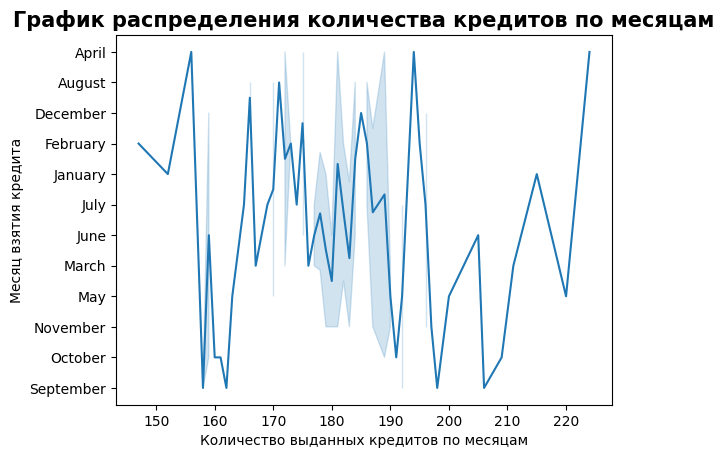

In [25]:
sns.lineplot(x = 'count_credits', y = 'month_credit', data = grouped_df_YM)
plt.title('График распределения количества кредитов по месяцам', fontsize = 15, fontweight='bold')
plt.xlabel('Количество выданных кредитов по месяцам')
plt.ylabel('Месяц взятия кредита')

Text(0, 0.5, 'Год взятия кредита')

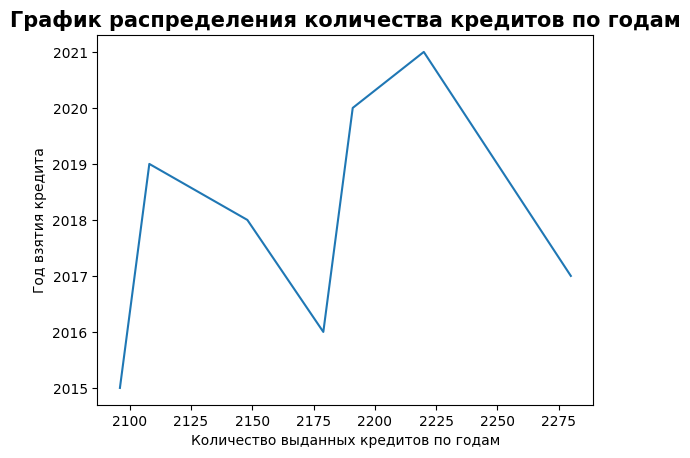

In [26]:
sns.lineplot(x = 'count_credits', y = 'year_credit', data = grouped_df_Y)
plt.title('График распределения количества кредитов по годам', fontsize = 15, fontweight='bold')
plt.xlabel('Количество выданных кредитов по годам')
plt.ylabel('Год взятия кредита')

Наибольшее количество кредитов было выдано в 2017 году.

Text(0.5, 0, 'Год взятия кредита')

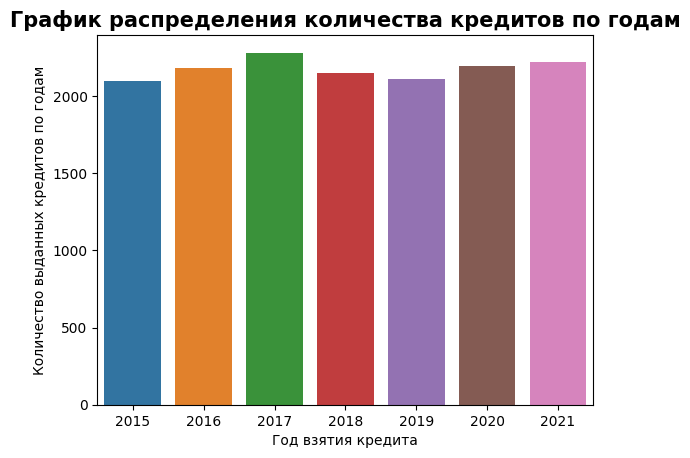

In [27]:
sns.barplot(y = 'count_credits', x = 'year_credit', data = grouped_df_Y)
plt.title('График распределения количества кредитов по годам', fontsize = 15, fontweight='bold')
plt.ylabel('Количество выданных кредитов по годам')
plt.xlabel('Год взятия кредита')

Text(0, 0.5, 'Месяц взятия кредита')

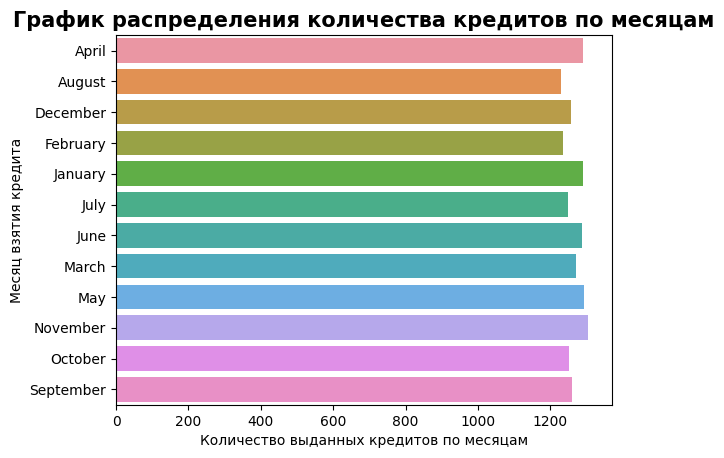

In [28]:
sns.barplot(x = 'count_credits', y = 'month_credit', data = grouped_df_M)
plt.title('График распределения количества кредитов по месяцам', fontsize = 15, fontweight='bold')
plt.xlabel('Количество выданных кредитов по месяцам')
plt.ylabel('Месяц взятия кредита')


**Для проверки данной гипотезы можно провести t-тест для проверки различия в среднем количестве выданных кредитов между разными годами и месяцами.** Критерий t-теста позволит определить, есть ли статистически значимая разница между количеством выданных кредитов в разные годы и месяцы. Если значение p-уровня значимости будет меньше выбранного уровня значимости (например, 0.05), то нулевая гипотеза будет отвергнута в пользу альтернативной.

1. Определяем с какими выборками требуется работать для проверки соответствующей гипотезы.
    - count_credits, year_credit, month_credit
2. Проверяем гипотезу о нормальности распределения выборок

$$
\text{гипотеза } H_0: \text{случайная величина **count credits** подчиняется нормальному закону распределения}
$$
$$
\text{гипотеза } H_1: \text{случайная величина **count credits** имеет распределение, отличное от нормального закона}  
$$

3. Проверяем гипотезу о равенстве параметров

In [29]:
alpha = 0.05

# По месяцам
shapiro(grouped_df_M['count_credits'])

ShapiroResult(statistic=0.9359732866287231, pvalue=0.44773074984550476)

In [30]:
# Проверка на нормальность с помощью критерия Колмогорова-Смирнова
kstest(grouped_df_M['count_credits'], 'norm',
     args=(grouped_df_M['count_credits'].mean(), grouped_df_M['count_credits'].std()))

KstestResult(statistic=0.1914313797680679, pvalue=0.7039822064926309, statistic_location=1287, statistic_sign=-1)

Выборка `shapiro(grouped_df_M['count_credits'])` имеет нормальное распределение, т.к. $p_\text{value} = 0.45 > \alpha = 0.05$ -- гипотезу H_0 принимаем. Kstest дал тот же результат.

In [31]:
# Проверяем, что две выборки имеют одинаковое распределение (используем двухвыборочный критерий Колмогорова-Смирнова)

ks_2samp(grouped_df_M['count_credits'],
        grouped_df_Y['count_credits'])

KstestResult(statistic=1.0, pvalue=3.9691990156386444e-05, statistic_location=1305, statistic_sign=1)

Признаки имеют одинаковое распределение - **нормальное**.

In [32]:
# t-тест
result = ttest_ind(grouped_df_M['count_credits'], grouped_df_Y['count_credits'], equal_var=False)
print(result)

TtestResult(statistic=-35.813476756282164, pvalue=3.189647794244528e-09, df=7.034243334653214)


  После выполнения данного кода, можно анализировать значение p-значения. Так как оно больше уровня значимости $\alpha = 0.05$, то можно принять нулевую гипотезу и считать, что количество выданных кредитов в разные годы и месяцы не отличается.

# **Визуализация данных.**

### Построим графики для числовых признаков.

In [33]:
# Установка стиля графиков
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [34]:
dict_to_rus = {'age': 'Возраст',
            'child_total': 'Количество детей',
            'dependants': 'Количество иждивенцев',
            'personal_income': 'Персональный доход',
            'credit': 'Сумма кредита',
            'term': 'Срок кредита',
            'loan_num_paym': 'Количество платежей, которые сделал клиент',
            'loan_dlq_num': 'Количество просрочек, допущенных клиентом',
            'loan_max_dlq_amt': 'Максимальная сумма просрочки (в рублях)',
            'socstatus_work_fl': 'Социальный статус клиента относительно работы',
            'socstatus_pens_fl': 'Социальный статус клиента относительно пенсии',
            'gender': 'Пол',
            'fl_presence_fl': 'Наличие в собственности квартиры',
            'auto_rus_fl': 'Наличие в собственности автомобиля российского производства',
            'hs_presence_fl': 'Наличие в собственности дома',
            'cot_presence_fl': 'Наличие в собственности коттеджа',
            'gar_presence_fl': 'Наличие в собственности гаража',
            'land_presence_fl': 'Наличие в собственности земельного участка',
            'own_auto': 'Количество автомобилей в собственности',
            'education': 'Образование',
            'marital_status': 'Семейное положение',
            'gen_industry': 'Отрасль работы',
            'gen_title': 'Должность',
            'org_tp_state': 'Форма собственности компании',
            'job_dir': 'Направление деятельности внутри компании',
            'family_income': 'Семейный доход',
            'tp_province': 'Область торговой точки, где клиент брал кредит',
            'region_nm': 'Регион РФ'}

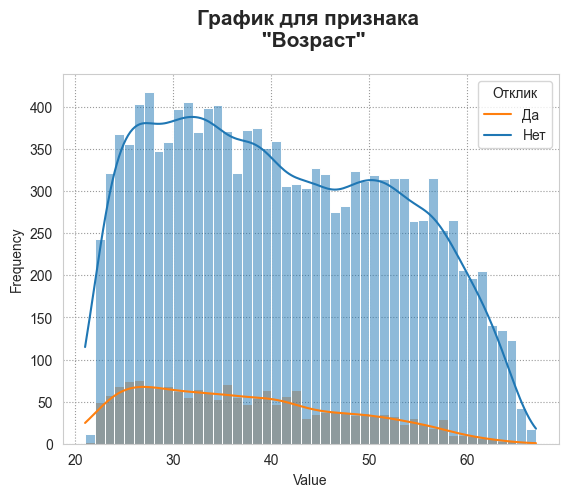

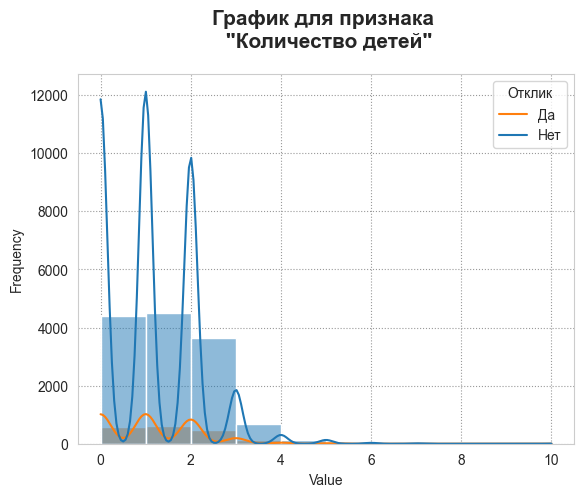

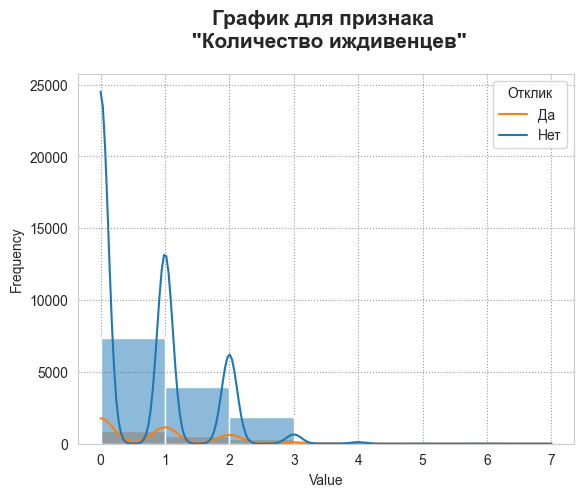

In [35]:
for col in numeric:
    ax = sns.histplot(x=col, data=df, hue='target', binwidth=1, kde = True)
    ax.set_title('График для признака \n "{}"'.format(dict_to_rus[col]), fontsize=15, fontweight='bold', pad=20)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    plt.subplots_adjust(hspace = 0.5)
    plt.legend(['Да', 'Нет'],  title='Отклик')
    plt.show()

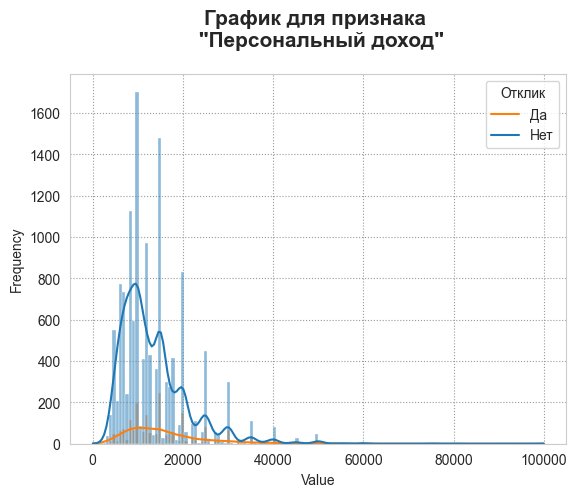

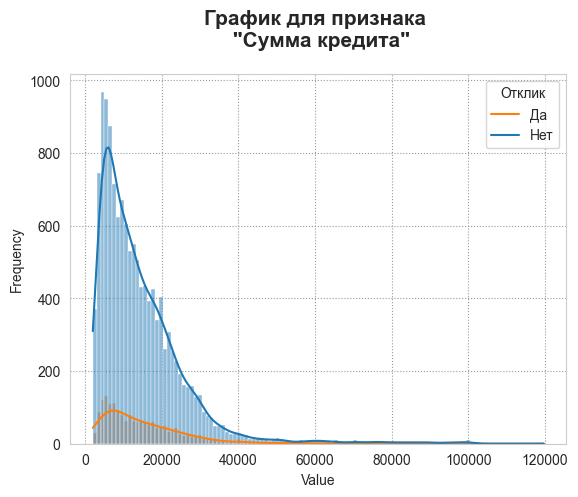

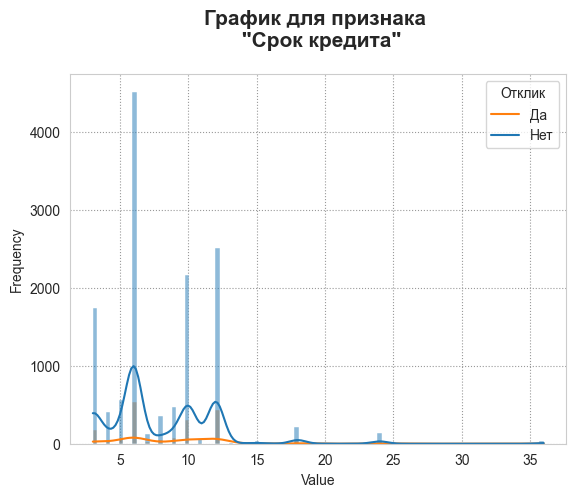

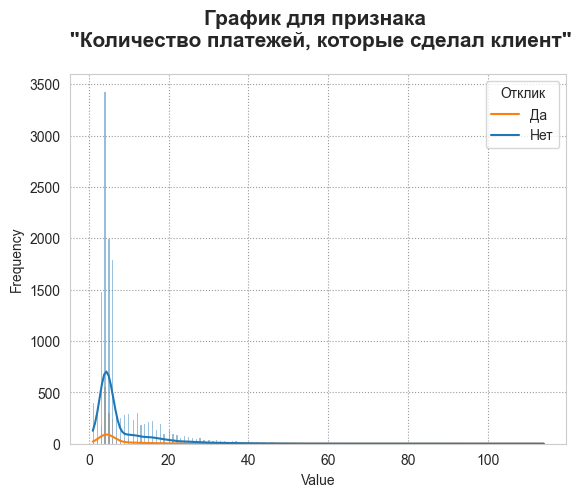

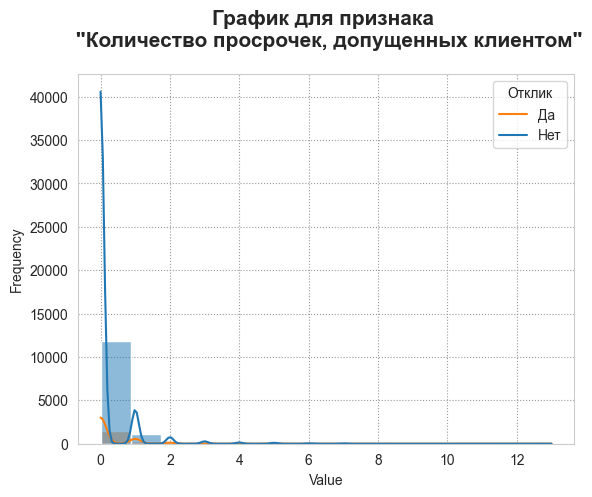

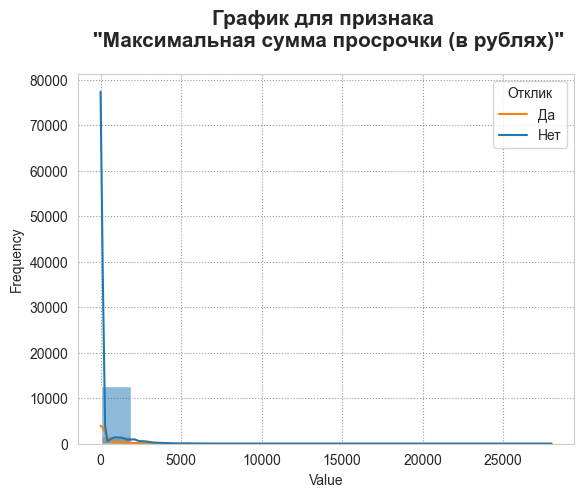

In [36]:
for col in numeric_2:
    ax = sns.histplot(x=col, data=df, hue='target', kde = True)
    ax.set_title('График для признака \n "{}"'.format(dict_to_rus[col]), fontsize=15, fontweight='bold', pad=20)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    plt.subplots_adjust(hspace = 0.5)
    plt.legend(['Да', 'Нет'],  title='Отклик')
    plt.show()


Проанализировав графики из списка `numeric_2`(доход, сумма кредита, срок и просрочки) можно сделать вывод, что чаще всего люди вносят все платежи вовремя, не допуская просрочек платежа.

Построим графики для категориальных признаков.

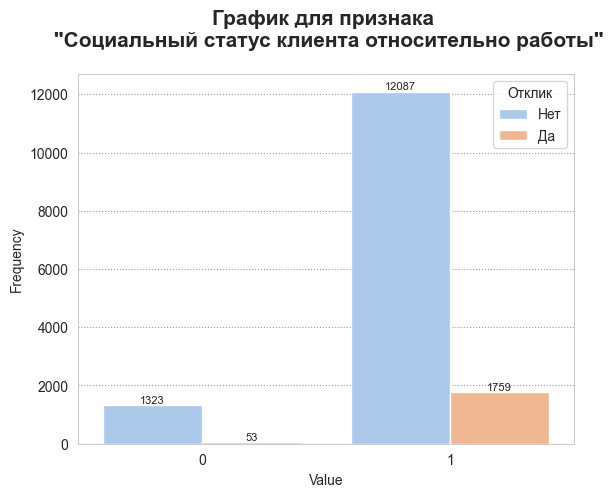

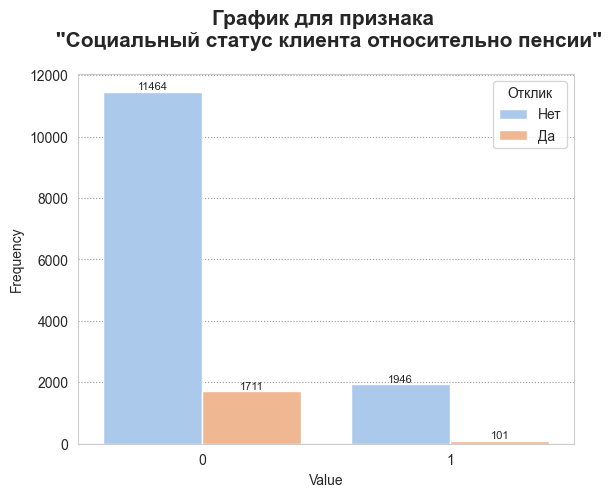

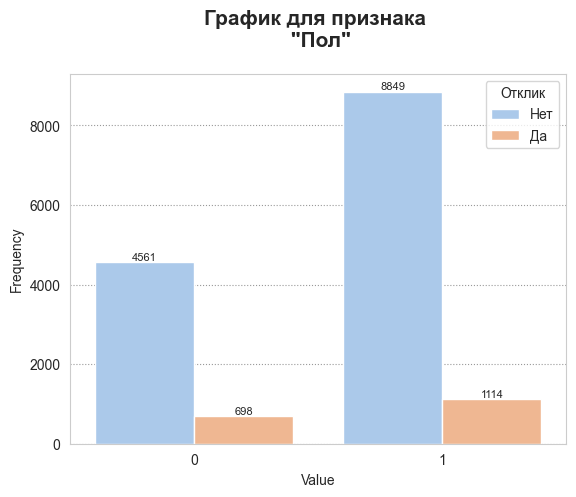

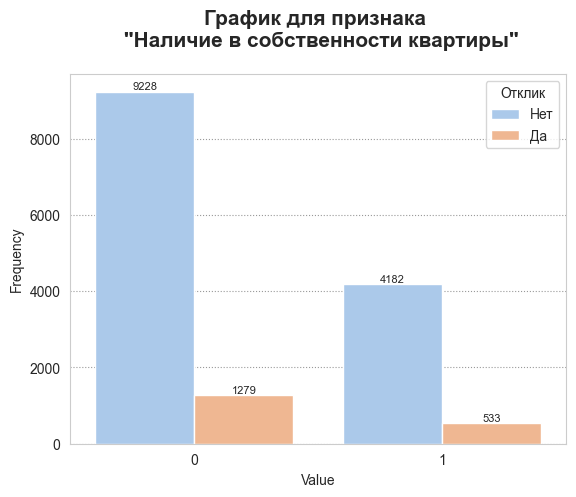

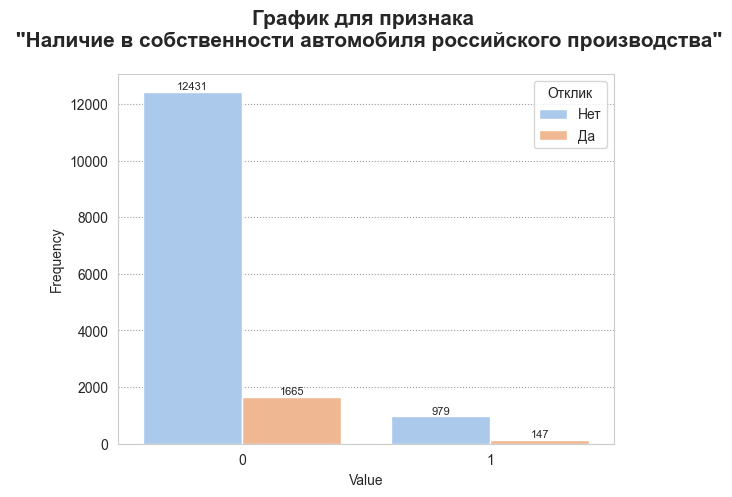

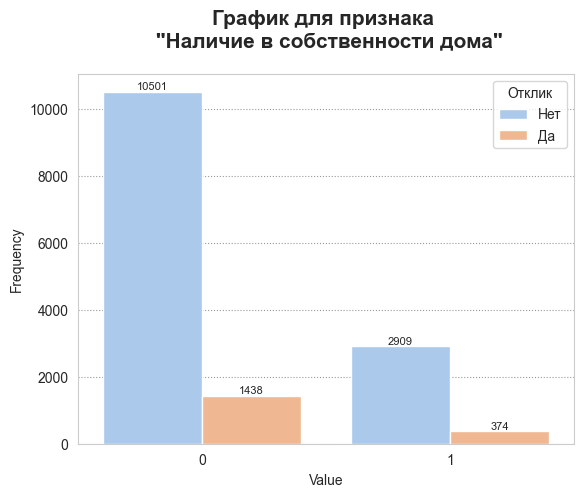

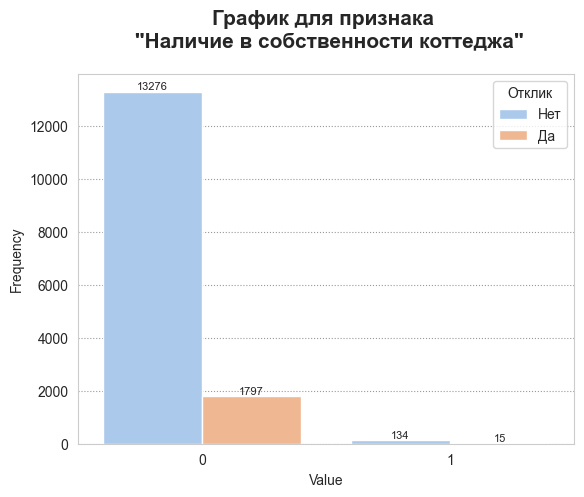

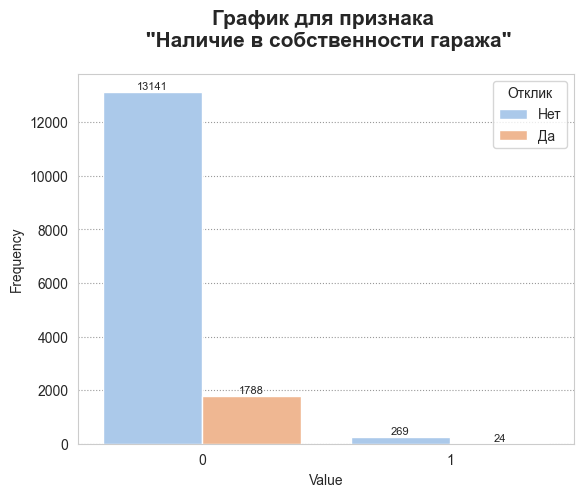

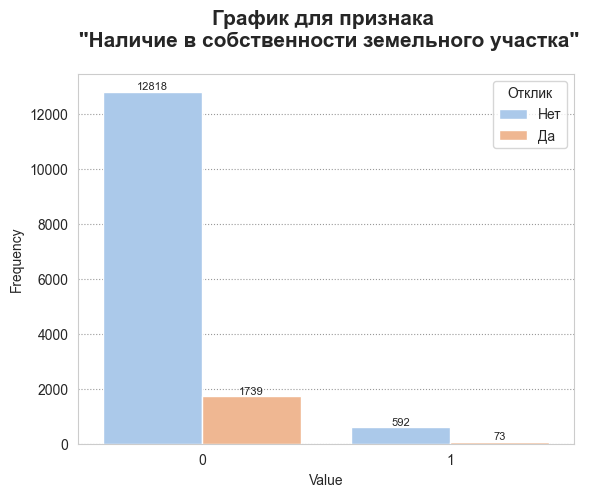

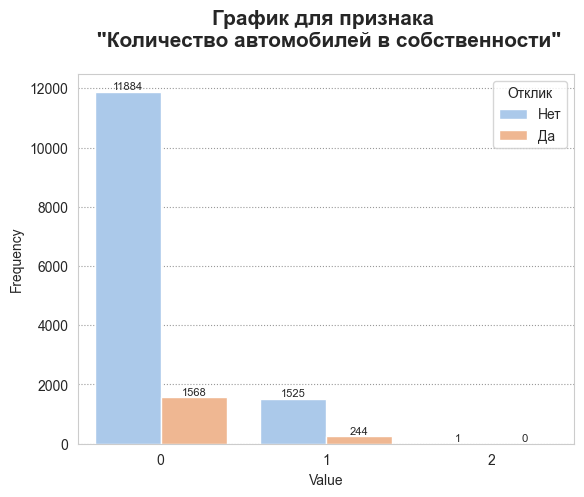

In [37]:
for col in categorical_bin:
    ax = sns.countplot(data=df,
                      x=col,
                      palette='pastel',
                      hue = 'target')
    ax.bar_label(ax.containers[0], fontsize=8)
    ax.bar_label(ax.containers[1], fontsize=8)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    ax.set_title('График для признака \n "{}"'.format(dict_to_rus[col]), fontsize=15, fontweight='bold', pad=20)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    plt.subplots_adjust(hspace = 0.5)
    plt.legend(['Нет', 'Да'],  title='Отклик')
    plt.show()


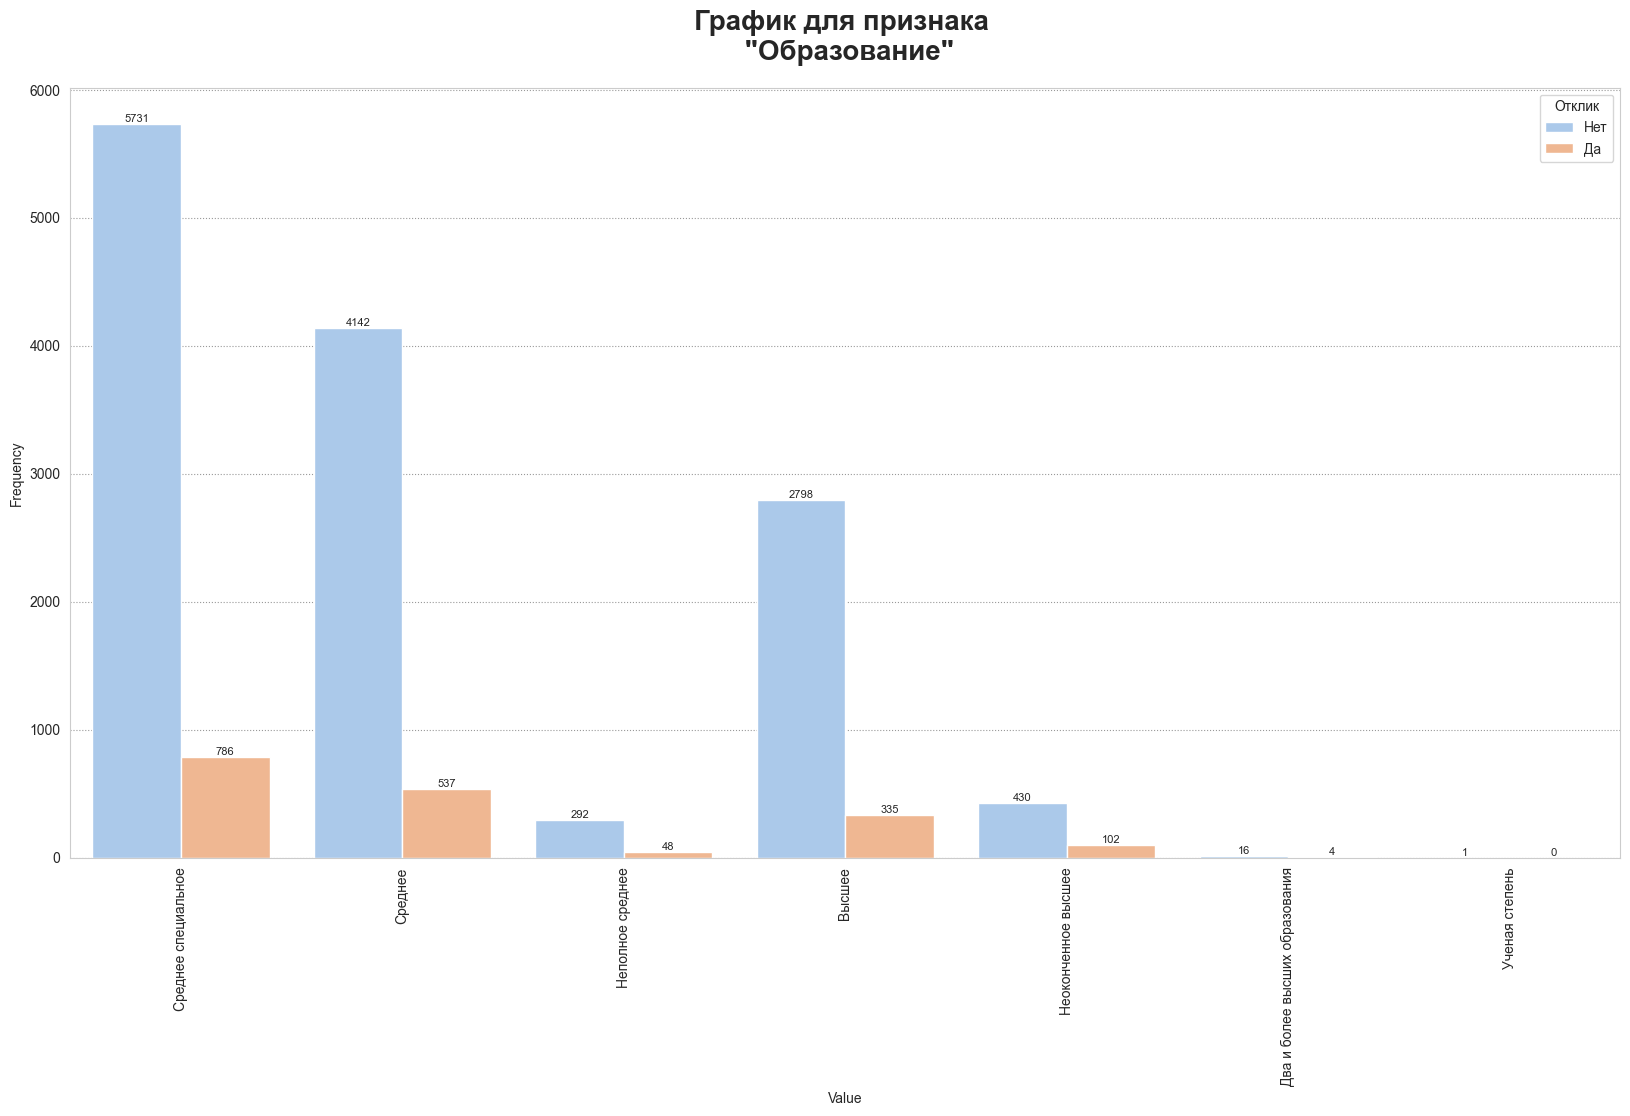

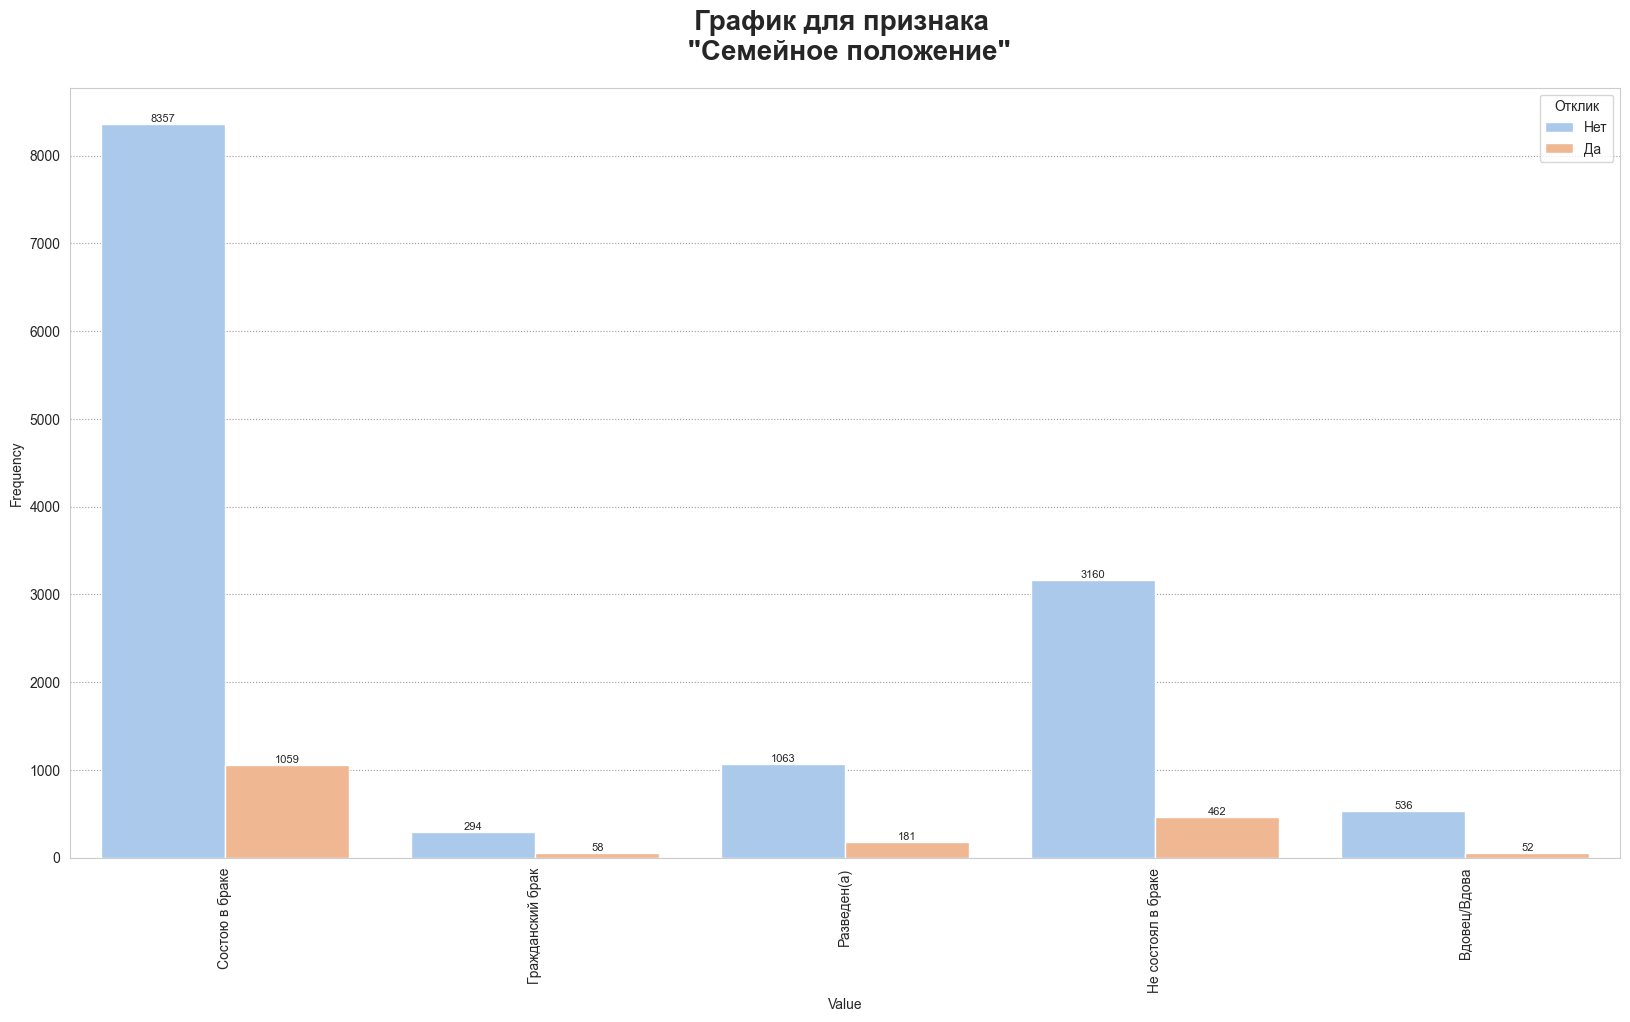

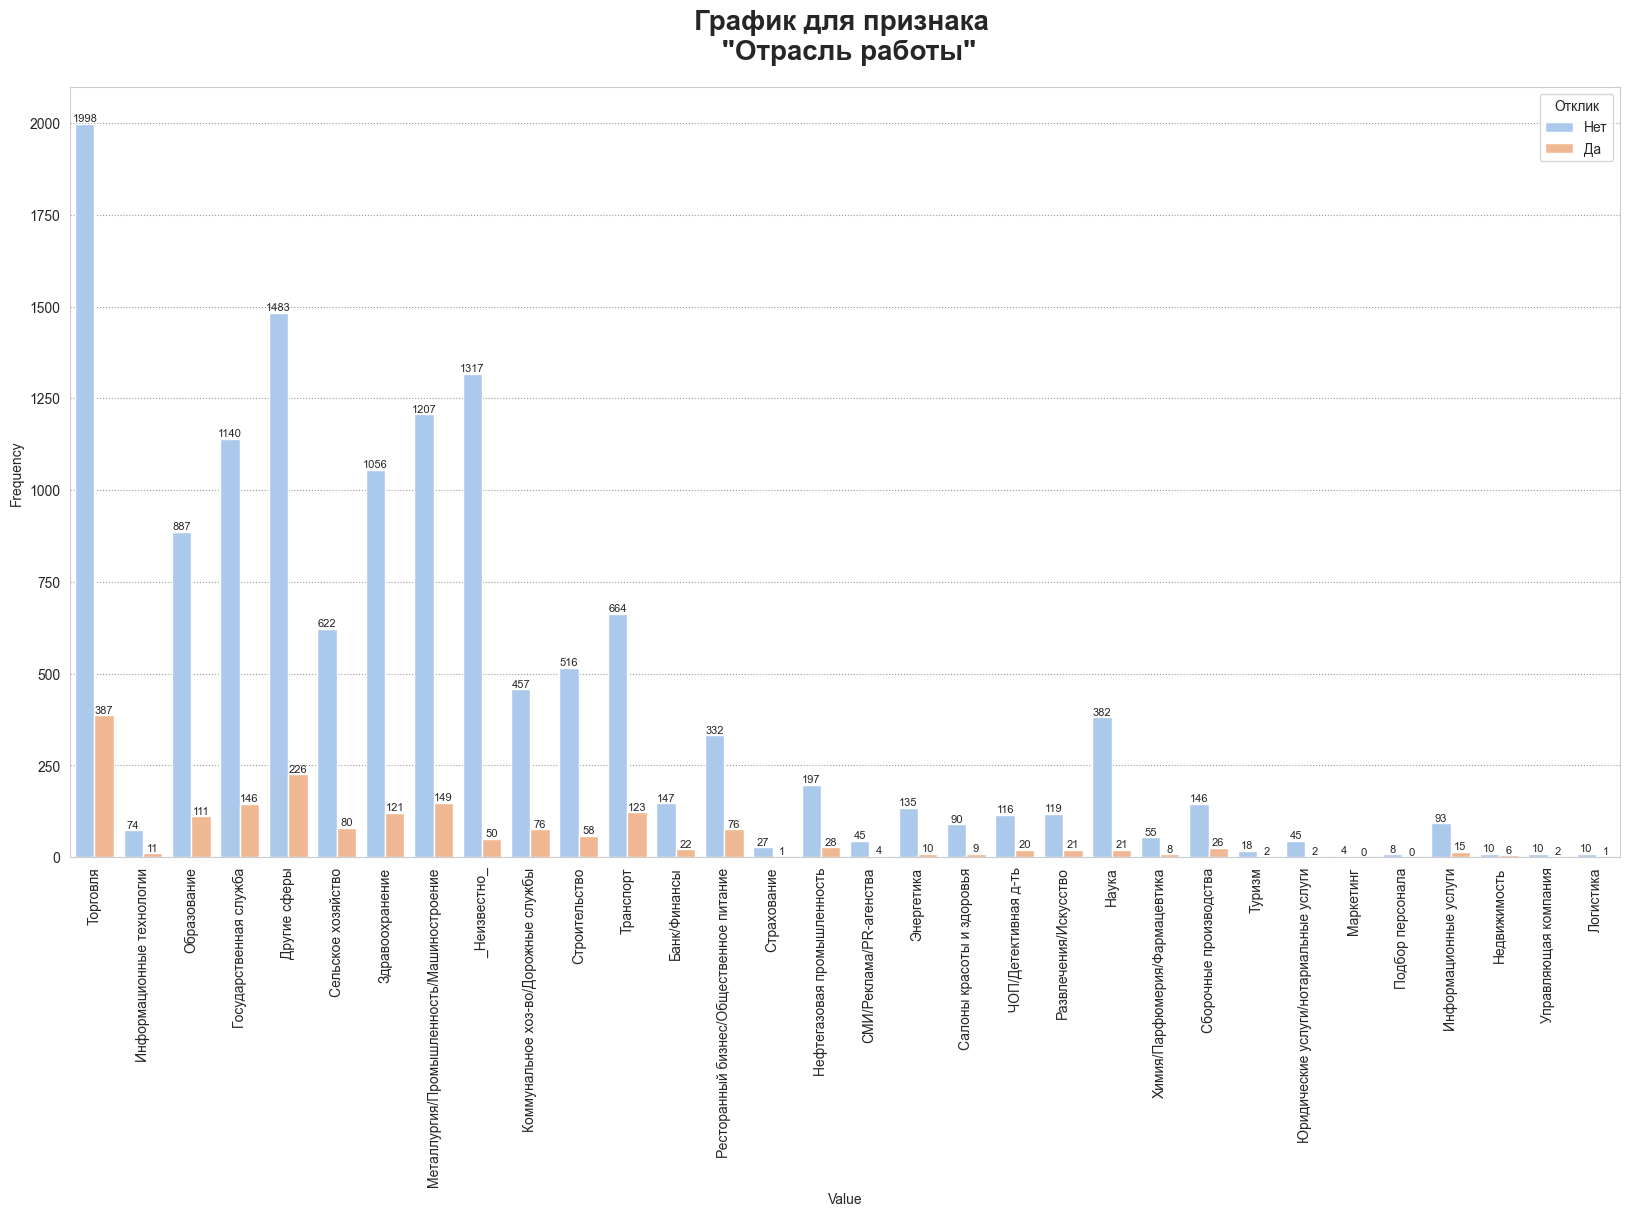

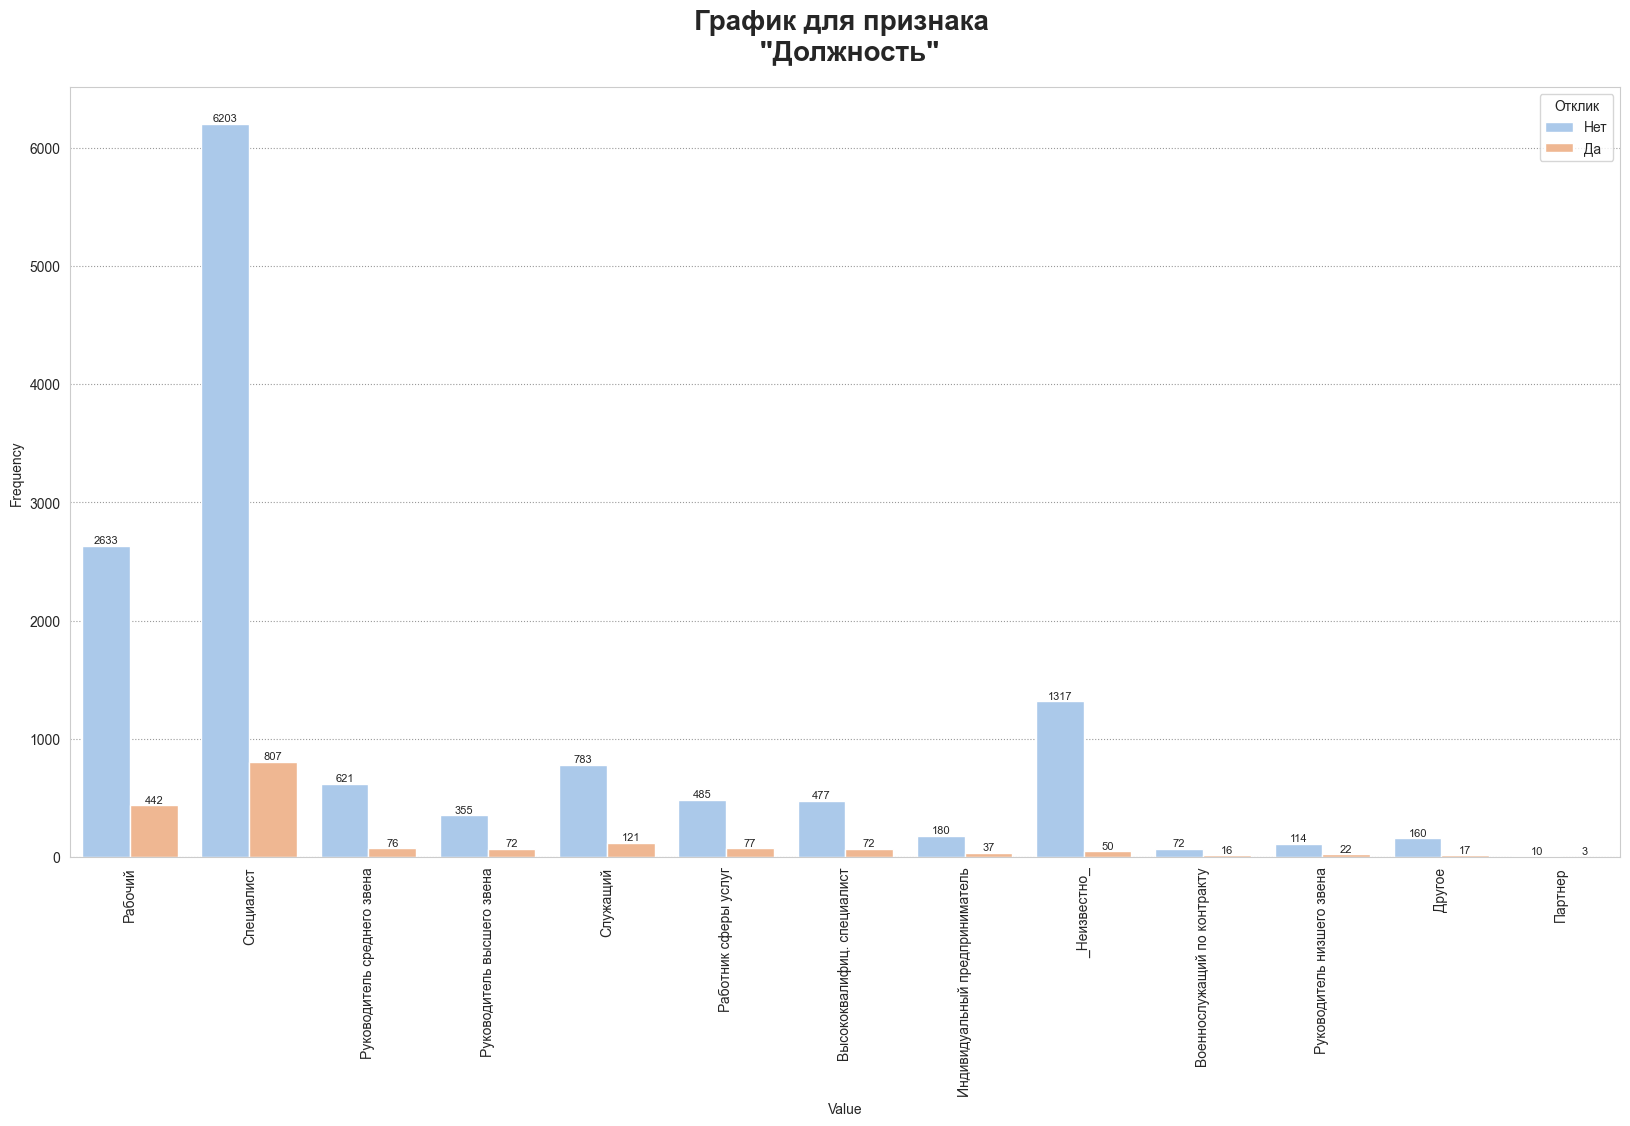

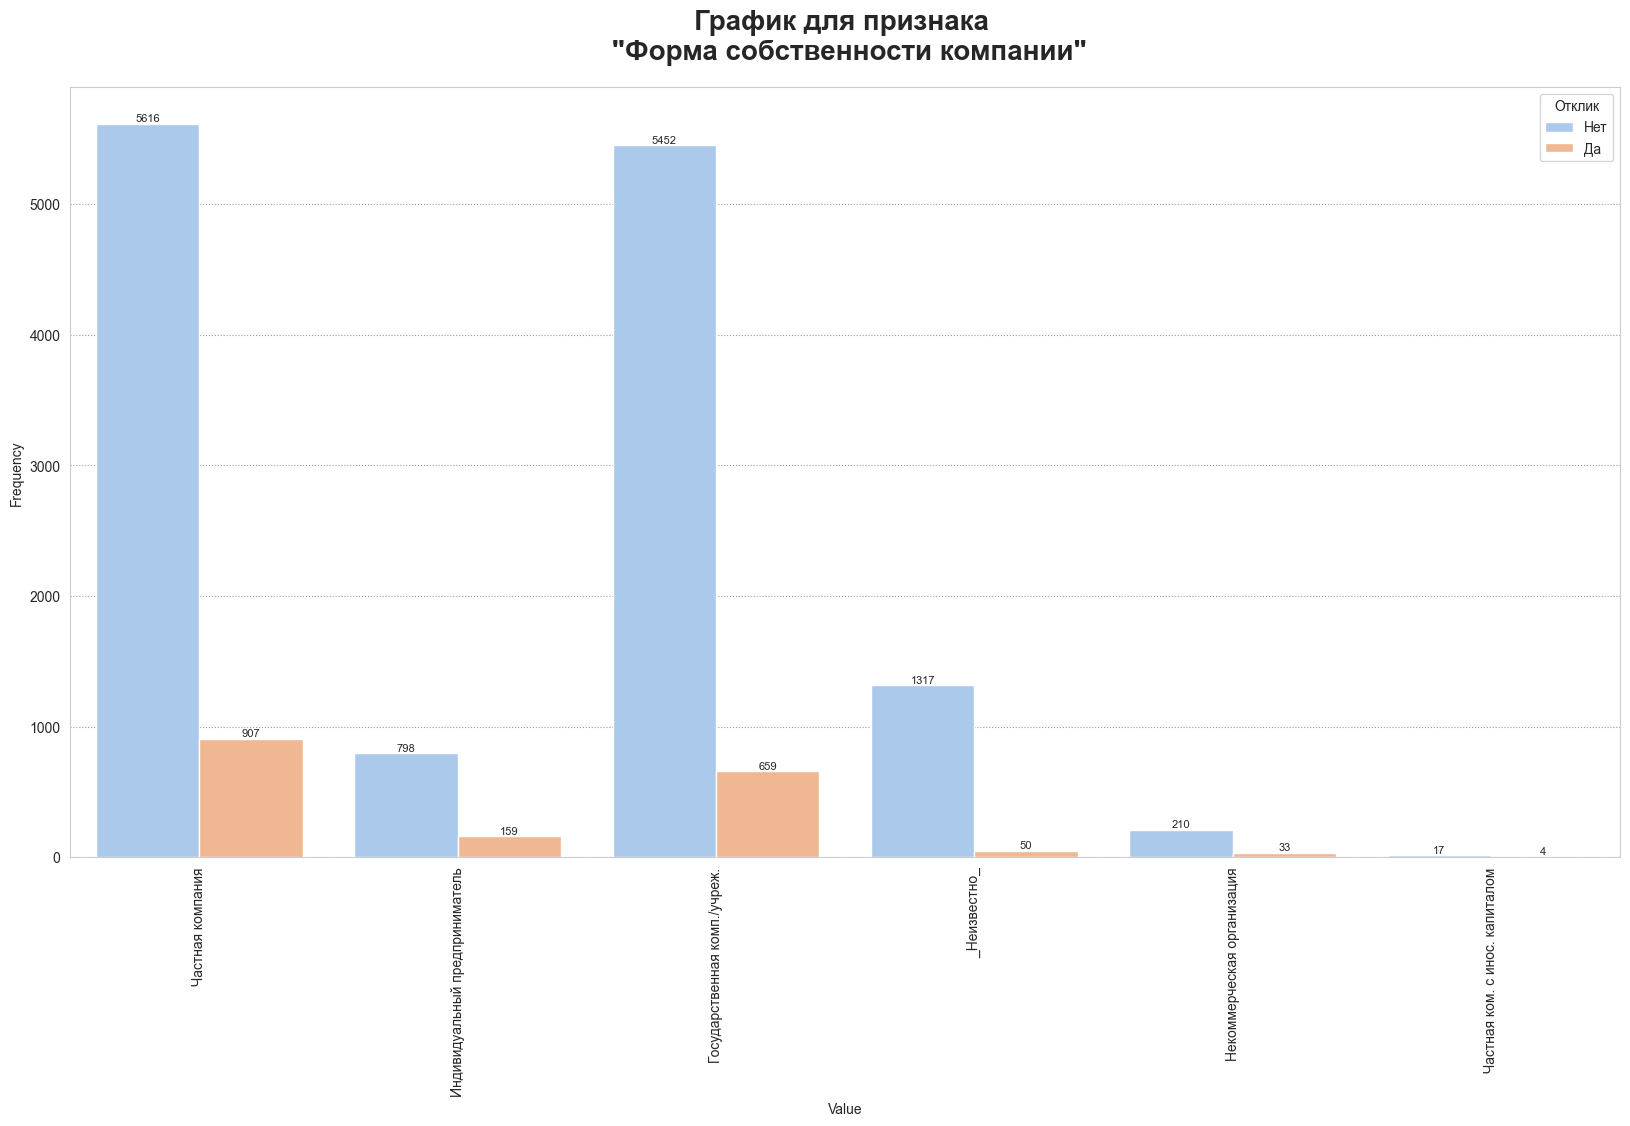

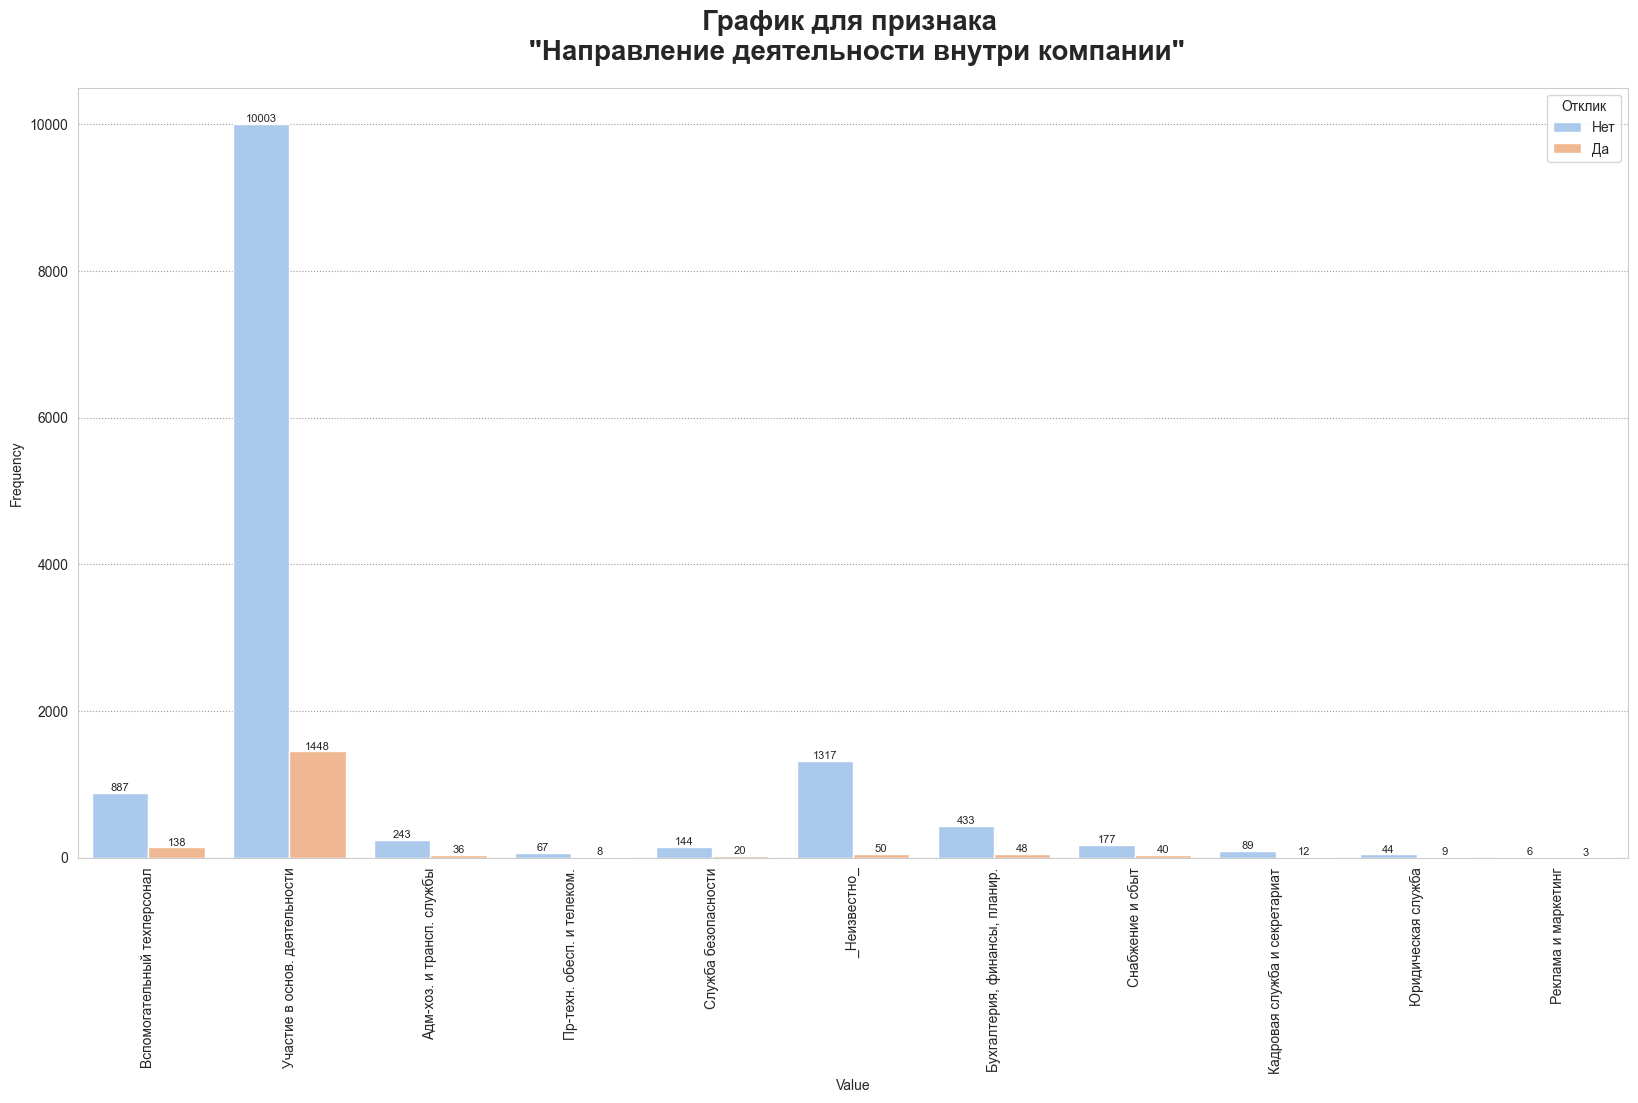

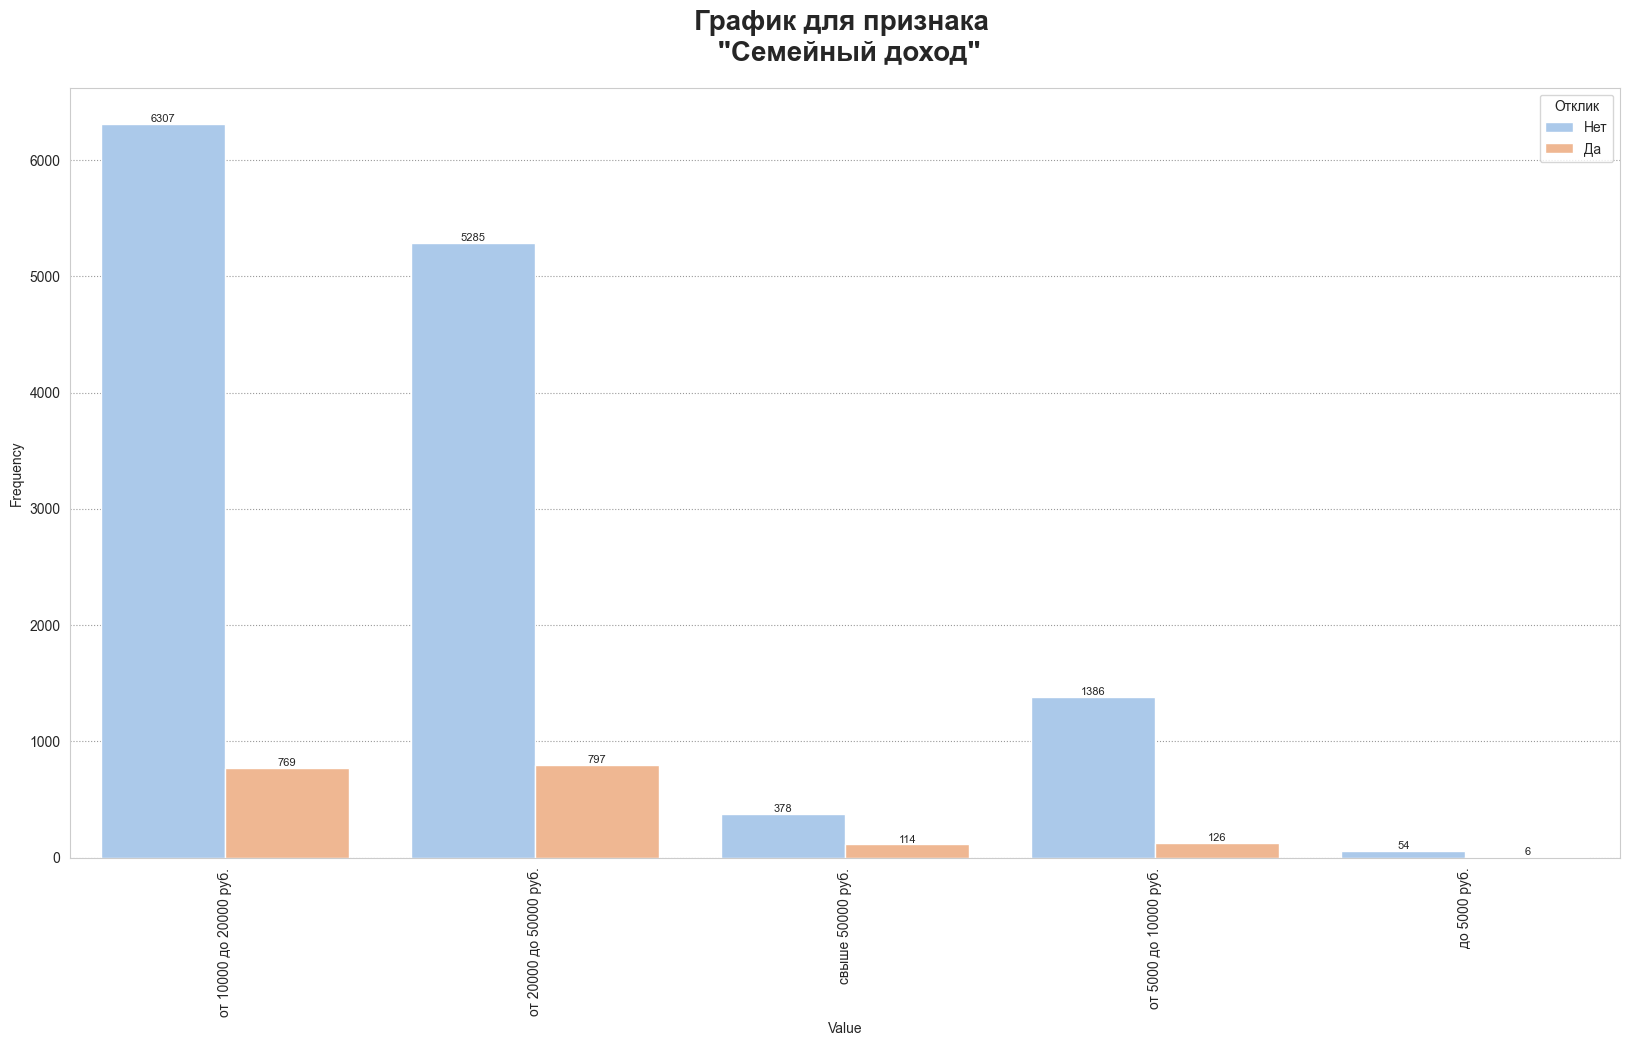

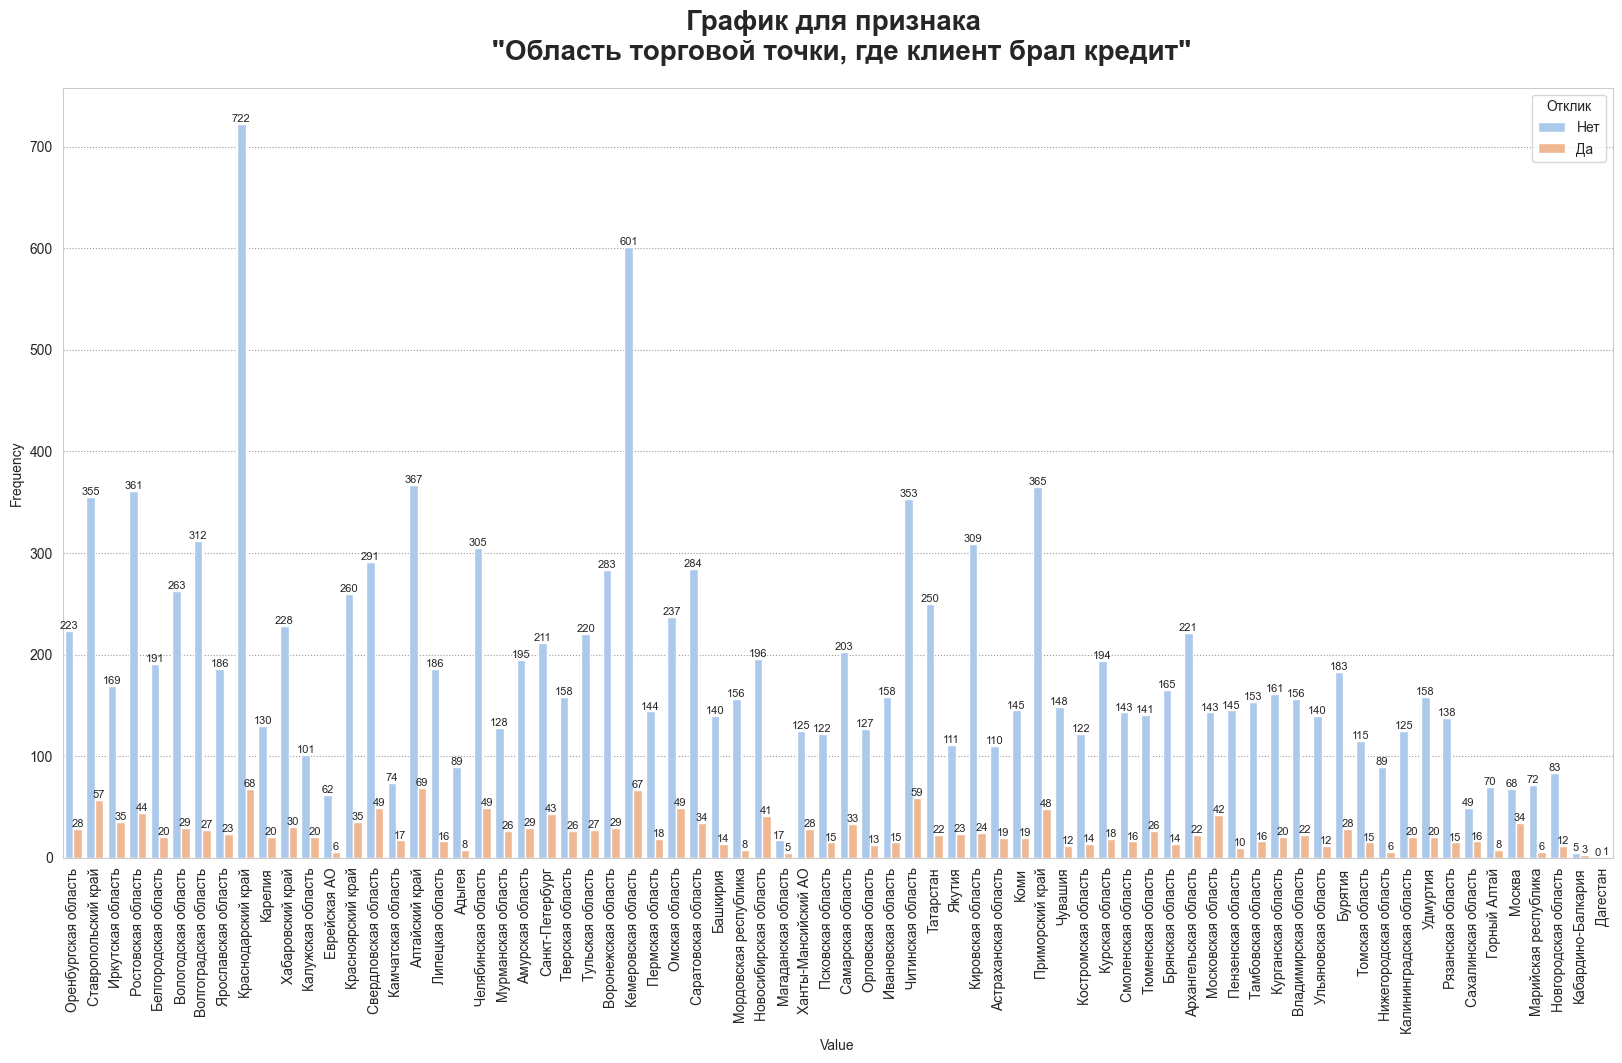

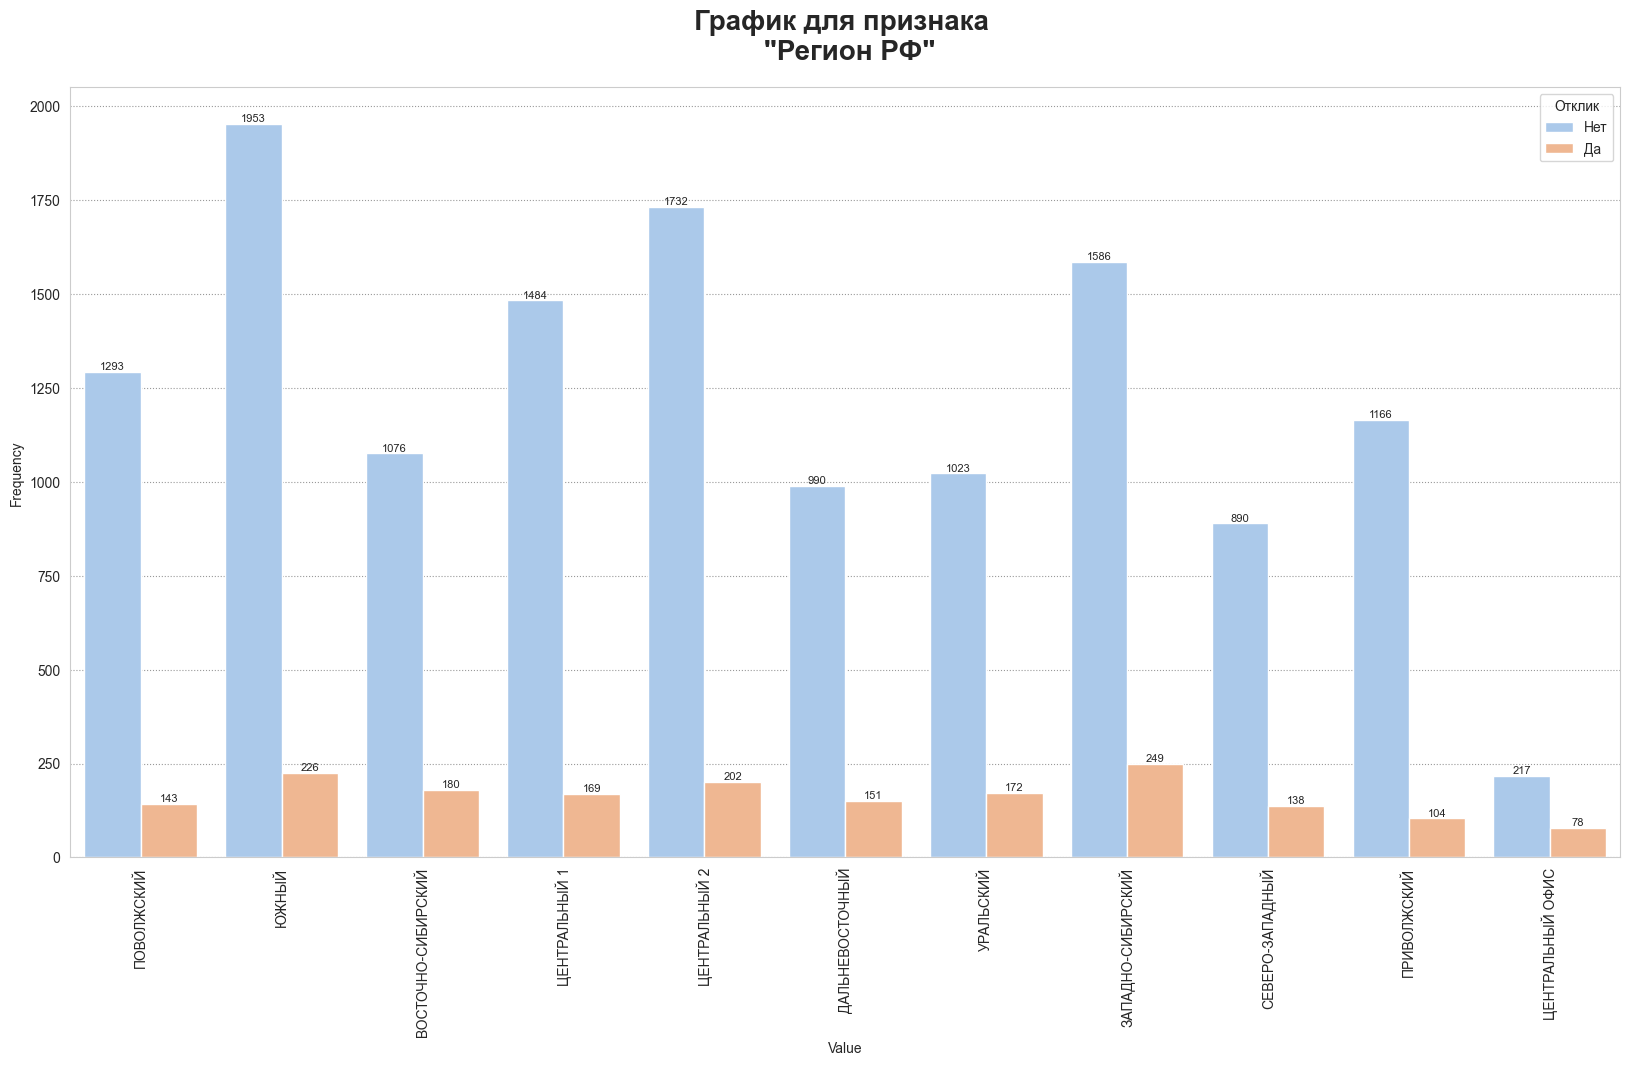

In [38]:
for col in categorical:
   plt.figure(figsize=(20, 10))
   ax = sns.countplot(data=df,
                    x=col,
                    palette='pastel',
                    hue = 'target')
   ax.bar_label(ax.containers[0], fontsize=8)
   ax.bar_label(ax.containers[1], fontsize=8)
   ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation = 90)
   ax.set_title('График для признака \n "{}"'.format(dict_to_rus[col]), fontsize=20, fontweight='bold', pad=20)
   ax.set_xlabel('Value', fontsize=10)
   ax.set_ylabel('Frequency', fontsize=10)
   plt.subplots_adjust(hspace = 1)
   plt.legend(['Нет', 'Да'], title='Отклик')
   plt.show()

# **Подведение итогов.**

### *В ходе исследования был проанализирован датасет с данными по маркетинговой компании банка. На основании проведенного анализа можно сделать следующие выводы о влиянии признаков на целевой признак.*

**Портрет клиента, склонного к отклику на рекламное предложение:**
1. Больше всего откликались работающие люди в возрасте от 25 до 45 лет. (Если 1 - это женщины, то преимущественно женщины)
2. Со средним , средним специальным образованием.
3. Имеющие 1, 2 ребенка.
4. Состоящие в браке.
5. С персональным доходом ниже 20000 и семейным доходом ниже 50000.
6. Занимающие должности специалист или рабочий , в гос учреждениях или частных компаниях.
7. Не имеющие в собственности недвижимого имущества.
8. Не имеющие в собственности автомобиля, либо имеющие один автомобиль, преимущественно иномарку.
9. Преимущественно из западно-сибирского , центрального и южного регионов РФ.

**Рекомендуется:**

1. Разработать персонализированные предложения кредитования
для семей на основе их потребностей и финансового положения.

2. Расширить ЦА, например провести опрос клиентов, чтобы выявить их ожидания и предпочтения
относительно условий кредитования и использовать эту информацию для улучшения предложений.

3. Внедрить программу лояльности для клиентов, предлагающую специальные бонусы и скидки
при использовании услуг банка, включая кредитование.
(особенно для клиентов предпенсионного и пенсионного возраста)

4. Улучшить процесс предоставления кредитов, сократив время ответа на заявки и упростив процедуры одобрения,
чтобы клиенты могли быстрее получить кредит.